In [1]:
import nltk
import numpy as np                                            # =========> This library is used for numerical operations and data manipulation.
import pandas as pd                                           # =========> This library is used for data loading, cleaning, and preprocessing.
import re                                                     # =========> This library is used for regular expression operations, which are useful for text processing.
from nltk.corpus import stopwords                             # =========> This is used to access the NLTK (Natural Language Toolkit) stopwords corpus,
                                                              # which contains common words that are often removed from text during preprocessing
from nltk.stem.porter import PorterStemmer                    # =========> This is used to implement the Porter stemming algorithm, 
                                                              # which is a common technique for reducing words to their base or stem form.
from sklearn.feature_extraction.text import TfidfVectorizer   # =========> This is used to convert text data into a numerical format that 
                                                              # can be used by machine learning algorithms.
from sklearn.model_selection import train_test_split          # =========> This is used to split the dataset into training and testing sets. 
from sklearn.linear_model import LogisticRegression           # =========> This is the machine learning algorithm used for the classification task.
from sklearn.metrics import accuracy_score                    # =========> This is used to evaluate the performance of the trained model.
import matplotlib.pyplot as plt

In [2]:
# Laoding Data to Pandas DataFrame

df = pd.read_csv('/kaggle/input/fack-or-real-news/train.csv')

In [3]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
df.shape

(20800, 5)

In [5]:
df.head

<bound method NDFrame.head of           id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2        

In [6]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
# Replacing missing values in Data with empty
df = df.fillna('')

In [8]:
# merging author and title column to content column 

df['content'] = df['author'] + ' ' + df['title'] 

In [9]:
df['content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

In [10]:
# Separating Data

x = df.drop(columns='label', axis=1)
y = df['label']

Stemming 

IS a processing of reducing word to it's root word

EX:==> playing , playing ====> play

In [11]:
stem = PorterStemmer()

In [12]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [13]:
df['content'] = df['content'].apply(stemming)

In [14]:
df['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [15]:
# Separating Data

x = df['content'].values
y = df['label'].values

In [16]:
x

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

In [17]:
y

array([1, 0, 1, ..., 0, 1, 1])

In [18]:
# Converting textual Data to Numerical Data 

t2n = TfidfVectorizer()

t2n.fit(x)

x = t2n.transform(x)

In [19]:
# splitting Data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state=2, stratify=y)

Training Model =======> Logistic Regression


In [20]:
model = LogisticRegression()


In [21]:
model.fit(x_train, y_train)

LogisticRegression()

Evaluation 


Accuracy Score

In [22]:
x_train_prediction = model.predict(x_train)

training_accuracy = accuracy_score(x_train_prediction, y_train)


In [23]:
print("Accuracy of Training: ", training_accuracy)

Accuracy of Training:  0.9865985576923076


In [24]:
x_test_prediction = model.predict(x_test)

testing_accuracy = accuracy_score(x_test_prediction, y_test)

In [25]:
print("Accuracy of Testing: ", testing_accuracy)

Accuracy of Testing:  0.9790865384615385


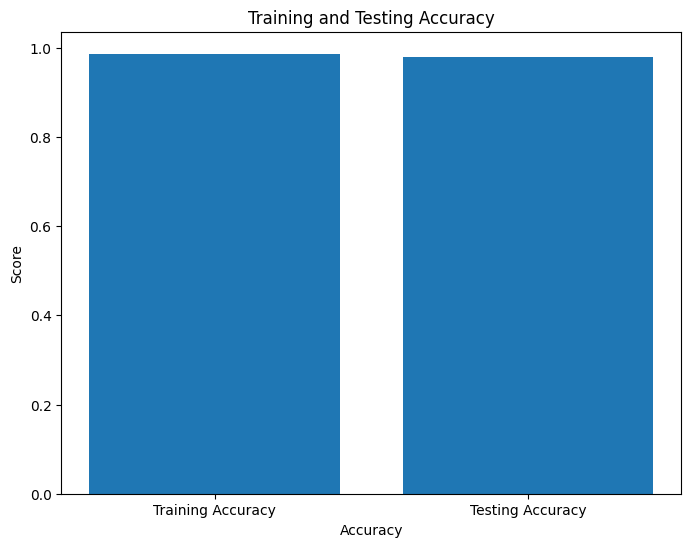

In [26]:
x = ['Training Accuracy', 'Testing Accuracy']
y = [training_accuracy, testing_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(x, y)

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Score')
plt.title('Training and Testing Accuracy')
plt.show()